In [12]:
import numpy as np
import pandas as pd
# будем отображать графики внутри ноутбука
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
!git clone https://github.com/neuralcomputer/ML_School.git

Cloning into 'ML_School'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 94 (delta 5), reused 0 (delta 0), pack-reused 79
Receiving objects: 100% (94/94), 33.83 MiB | 31.30 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [18]:
data = pd.read_csv('constituents-financials_csv.csv', sep=',')
data.head()

Symbol                      Name                  Sector   Price  \
0      A  Agilent Technologies Inc             Health Care   65.05   
1    AAL   American Airlines Group             Industrials   48.60   
2    AAP        Advance Auto Parts  Consumer Discretionary  109.63   
3   AAPL                Apple Inc.  Information Technology  155.15   
4   ABBV               AbbVie Inc.             Health Care  108.48   

   Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  52 Week High  \
0           27.45        0.875698            2.10        75.00         49.23   
1            9.92        0.778210            3.91        59.08         39.21   
2           19.54        0.218321            6.19       169.55         78.81   
3           16.86        1.579541            9.20       180.10        131.12   
4           19.41        2.499560            3.29       125.86         60.05   

     Market Cap        EBITDA  Price/Sales  Price/Book  \
0   21984606918  1.094000e+09     6.493563        4.56   
1   24594852352  5.761000e+09     0.580226        6.03   
2    8123611867  8.539410e+08     1.130106        2.51   
3  809508034020  7.938600e+10     3.458609        5.66   
4  181386347059  1.031000e+10     6.291571       26.14   

                                         SEC Filings  
0  http://www.sec.gov/cgi-bin/browse-edgar?action...  
1  http://www.sec.gov/cgi-bin/browse-edgar?action...  
2  http://www.sec.gov/cgi-bin/browse-edgar?action...  
3  http://www.sec.gov/cgi-bin/browse-edgar?action...  
4  http://www.sec.gov/cgi-bin/browse-edgar?action...

In [19]:
data.shape

(505, 14)

In [20]:
data.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

In [21]:
data.dtypes

Symbol             object
Name               object
Sector             object
Price             float64
Price/Earnings    float64
Dividend Yield    float64
Earnings/Share    float64
52 Week Low       float64
52 Week High      float64
Market Cap          int64
EBITDA            float64
Price/Sales       float64
Price/Book        float64
SEC Filings        object
dtype: object

In [26]:
industrials_count = data[data['Sector'] == 'Industrials'].shape[0]
industrials_count

67

In [27]:
# группируем по значениям столбцов Sector и
group=data.groupby('Sector')
group.size() # считаем количество строк, оказавшихся в каждой группе

Sector
Consumer Discretionary        84
Consumer Staples              34
Energy                        32
Financials                    68
Health Care                   61
Industrials                   67
Information Technology        70
Materials                     25
Real Estate                   33
Telecommunication Services     3
Utilities                     28
dtype: int64

In [33]:
#кол-во строк, содержащие пропущенные значения
missing_values_count = data.isnull().any(axis=1).sum()
missing_values_count

10

In [32]:
data.count()

Symbol            505
Name              505
Sector            505
Price             505
Price/Earnings    503
Dividend Yield    505
Earnings/Share    505
52 Week Low       505
52 Week High      505
Market Cap        505
EBITDA            505
Price/Sales       505
Price/Book        497
SEC Filings       505
dtype: int64

Проверка, есть ли в группе хоть одна фирма с аббревиатурой (столбец Symbol), начинающейся на букву "А"

In [34]:
letter="A"
for i in group.Symbol:
    print('{}: {}'.format(i[0],(i[1].str.get(0)==letter).any()))

Consumer Discretionary: True
Consumer Staples: True
Energy: True
Financials: True
Health Care: True
Industrials: True
Information Technology: True
Materials: True
Real Estate: True
Telecommunication Services: False
Utilities: True


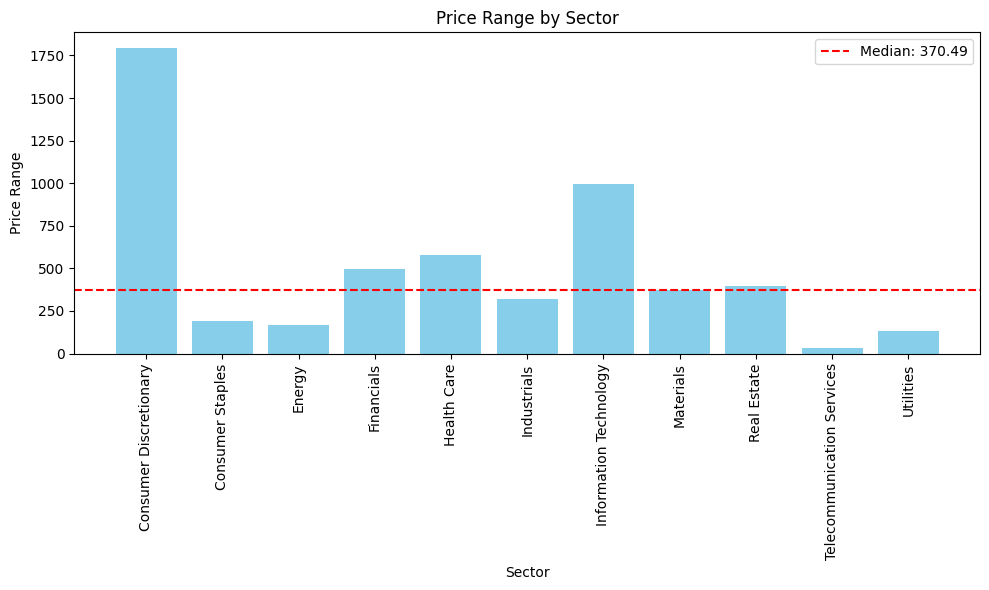

In [35]:
# Группировка данных по столбцу 'Sector' и вычисление разницы между max и min значениями 'Price'
price_range_by_sector = data.groupby('Sector')['Price'].agg(lambda x: x.max() - x.min()).reset_index()

# Переименование столбца для наглядности
price_range_by_sector.columns = ['Sector', 'Price Range']

# Построение столбчатого графика
plt.figure(figsize=(10, 6))
bars = plt.bar(price_range_by_sector['Sector'], price_range_by_sector['Price Range'], color='skyblue')

# Настройка графика
plt.xlabel('Sector')
plt.ylabel('Price Range')
plt.title('Price Range by Sector')
plt.xticks(rotation=90)

# Вычисление и отображение медианного значения
median_value = price_range_by_sector['Price Range'].median()
plt.axhline(y=median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')

# Добавление легенды
plt.legend()

# Показ графика
plt.tight_layout()
plt.show()

In [36]:
data['Price']

0       65.05
1       48.60
2      109.63
3      155.15
4      108.48
        ...  
500     70.24
501     76.30
502    115.53
503     50.71
504     71.51
Name: Price, Length: 505, dtype: float64

In [40]:
price_intervals = pd.cut(data['Price'], bins=5, labels=["Very Low", "Low", "Medium", "High", "Exclusive"], include_lowest=True)

# Добавление нового столбца с интервалами
data['Price Interval'] = price_intervals

# Вывод названия фирмы, у которой цена входит в интервал "Exclusive"
exclusive_companies = data[data['Price Interval'] == "Exclusive"]['Name']

print("Фирмы, у которых цена входит в интервал 'Exclusive':")
print(exclusive_companies)

Фирмы, у которых цена входит в интервал 'Exclusive':
360    Priceline.com Inc
Name: Name, dtype: object


In [51]:
data['Price Interval']

0      Very Low
1      Very Low
2      Very Low
3      Very Low
4      Very Low
         ...   
500    Very Low
501    Very Low
502    Very Low
503    Very Low
504    Very Low
Name: Price Interval, Length: 505, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Exclusive']